# K-Nearest Neighbors

En este script de Python veremos como implementar en código todo lo que vimos ya conceptualmente. Python tiene muchas funciones que nos facilitan la vida, y por eso es importante saber qué es lo que está haciendo la computadora cuando hacemos código, y no sólo escribir código a lo tonto.

### Paso 1: Importamos las principales bibliotecas que vamos a utilizar en la sesión.
Abrá otras que importareamos después según vayamos requiriendo las funciones

In [1]:
import numpy as np # Numeric Python, me deja manipular facilmente arreglos y listas numéricos
import pandas as pd # Pandas es la principal biblioteca de manejo de bases de datos en Python
import matplotlib.pyplot as plt # Este es para hacer grafiquitas
import seaborn as sns # Está basado en matplotlib, y hace gráficas más bonitas más fácil.

%matplotlib inline

### Paso 2: descargo e importo la base de datos

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


    Imaginémonos que nuestro KNN va a clasificar con base en dos atributos nada más. ¿Qué vemos en la gráfica? Los azules todo bien pero, ¿es clara la "diferencia" entre naranjas y verdes? ¿Cómo lo podríamos solucionar?

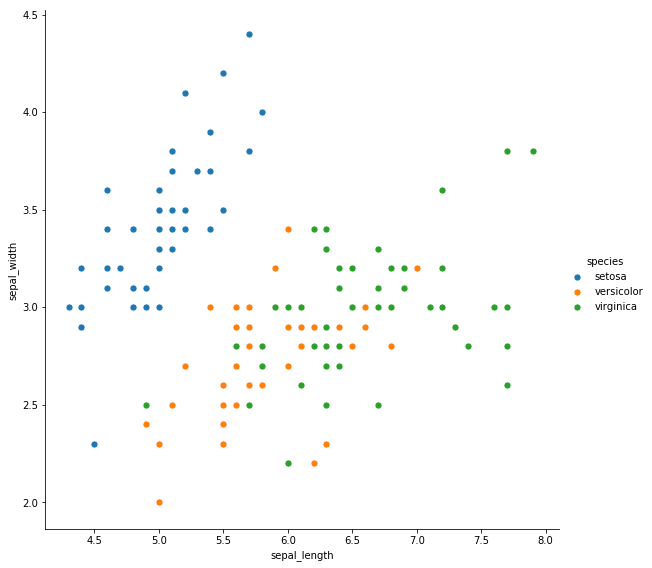

In [3]:
sns.pairplot(x_vars = 'sepal_length', y_vars = 'sepal_width', hue = 'species', 
             plot_kws={"s": 50}, height = 8, data = iris)

### Paso 3: Separo mi base en atributos (variables independientes, si quieren verlo así) y etiquetas (variable dependiente)

In [4]:
x = iris.iloc[:, :4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y = iris.iloc[:, 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

### Paso 4: Vamos a dividir nuestra base en una base de entrenamiento y otra de prueba. Dejemos 80% para que el KNN memorice, y 20% para ver qué tan bien "aprendió" a clasificar

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [7]:
len(iris)
len(x_train)

120

En teoría, una buena K para empezar a explorar es la raíz cuadrada del número de observaciones de mi base de entrenamiento. En este caso es la raíz de 120, es decir, 11 aproximadamente.

In [8]:
import math
math.sqrt(120)

10.954451150103322

### Paso 5: Normalizo mis datos para que tengan una escala común

Primero importo la función que me permite normalizar facilmente, y luego le digo que calcule media y desviación que va a usar luego para normalizar (en la parte del fit).

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

Ahora sí, re-escalo mis variables

In [10]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[ 0.75      ,  0.5       ,  0.62068966,  0.54166667],
       [ 0.52777778,  0.33333333,  0.63793103,  0.70833333],
       [ 0.66666667,  0.20833333,  0.81034483,  0.70833333],
       [ 0.30555556,  0.58333333,  0.10344828,  0.04166667],
       [ 0.38888889,  0.25      ,  0.4137931 ,  0.375     ],
       [ 0.44444444,  0.41666667,  0.53448276,  0.58333333],
       [ 0.13888889,  0.58333333,  0.0862069 ,  0.04166667],
       [ 0.66666667,  0.41666667,  0.67241379,  0.66666667],
       [ 0.08333333,  0.58333333,  0.05172414,  0.08333333],
       [ 0.22222222,  0.625     ,  0.05172414,  0.04166667],
       [ 0.22222222,  0.75      ,  0.13793103,  0.125     ],
       [ 0.22222222,  0.58333333,  0.06896552,  0.04166667],
       [ 0.36111111,  0.33333333,  0.65517241,  0.79166667],
       [ 0.02777778,  0.375     ,  0.05172414,  0.04166667],
       [ 0.19444444,  0.625     ,  0.0862069 ,  0.20833333],
       [ 0.66666667,  0.54166667,  0.79310345,  0.83333333],
       [ 0.30555556,  0.

In [11]:
x_train.min(), x_train.max()

(0.0, 1.0)

### Paso 6: Importo mi clasificador y le digo que memorice los datos de entrenamiento 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

### Paso 7: Hago la predicción con mis atributos del set de prueba

In [13]:
y_pred = classifier.predict(x_test)
y_pred

array(['versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor'], dtype=object)

### Paso 8: revisamos qué tan bien lo hicimos

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0  8  1]
 [ 0  0  5]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.89      0.94         9
   virginica       0.83      1.00      0.91         5

   micro avg       0.97      0.97      0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



**EXTRA: podemos ver con nuestro set de prueba el número de errores promedio que tendríamos con distintas K's

In [15]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
error
    

[0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.1,
 0.1,
 0.06666666666666667]

(0, 0.2)

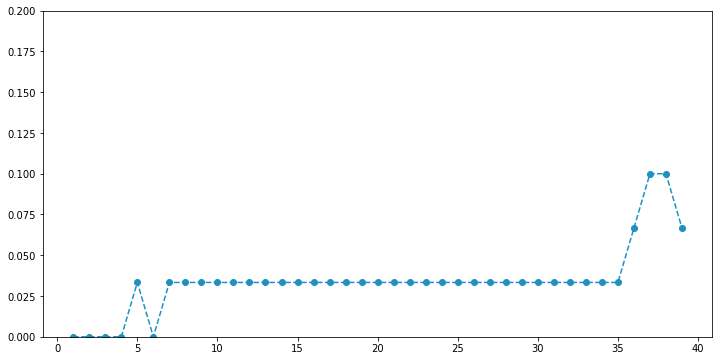

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = '#1d91c0', linestyle = 'dashed', marker = 'o')
plt.ylim(0, 0.2)